# Sprint
## 自然言語処理入門

## 1.このSprintについて

### Sprintの目的
- 自然言語処理の一連の流れを学ぶ
- 自然言語のベクトル化の方法を学ぶ

### どのように学ぶか
自然言語処理定番のデータセットを用いて、一連の流れを見ていきます。

## 2.自然言語のベクトル化

**自然言語処理（NLP, Natural Language Processing）**とは人間が普段使っている**自然言語**をコンピュータに処理させる技術のことです。ここではその中でも、機械学習の入力として自然言語を用いることを考えていきます。


多くの機械学習手法は**数値データ（量的変数）**の入力を前提にしていますので、自然言語の**テキストデータ**を数値データに変換する必要があります。これを**自然言語のベクトル化**と呼びます。ベクトル化の際にテキストデータの特徴をうまく捉えられるよう、様々な手法が考えられてきていますので、このSprintではそれらを学びます。


### 非構造化データ
データの分類として、表に数値がまとめられたようなコンピュータが扱いやすい形を**構造化データ**、人間が扱いやすい画像・動画・テキスト・音声などを**非構造化データ**と呼ぶことがあります。自然言語のベクトル化は、非構造化データを構造化データに変換する工程と言えます。同じ非構造化データでも、画像に対してはディープラーニングを用いる場合この変換作業はあまり必要がありませんでしたが、テキストにおいてはこれをどう行うかが重要です。


### 自然言語処理により何ができるか
機械学習の入力や出力に自然言語のテキストを用いることで様々なことができます。入力も出力もテキストである例としては**機械翻訳**があげられ、実用化されています。入力は画像で出力がテキストである**画像キャプション生成**やその逆の文章からの画像生成も研究が進んでいます。


しかし、出力をテキストや画像のような非構造化データとすることは難易度が高いです。比較的簡単にできることとしては、入力をテキスト、出力をカテゴリーとする**テキスト分類**です。


アヤメやタイタニック、手書き数字のような定番の存在として、**IMDB映画レビューデータセット**の感情分析があります。レビューの文書が映画に対して肯定的か否定的かを2値分類します。文書ごとの肯定・否定はラベルが与えられています。このSprintではこれを使っていきます。



## 3.IMDB映画レビューデータセットの準備

IMDB映画レビューデータセットを準備します。


### ダウンロード
次のwgetコマンドによってダウンロードします。

In [1]:
# IMDBをカレントフォルダにダウンロード
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# 解凍
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsupはラベル無しのため削除
!rm -rf aclImdb/train/unsup
# IMDBデータセットの説明を表示
!cat aclImdb/README

'wget' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B
tar: Error opening archive: Failed to open 'aclImdb_v1.tar.gz'
'rm' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B
'cat' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B


以下のサイトで公開されているデータセットです。


[Sentiment Analysis](http://ai.stanford.edu/~amaas/data/sentiment/)

### 読み込み
scikit-learnのload_filesを用いて読み込みます。


[sklearn.datasets.load_files — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_files.html)

In [2]:
# 《読み込むコード》
from sklearn.datasets import load_files
train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


### このデータセットについて
中身を見てみると、英語の文章が入っていることが分かります。

In [3]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


IMDBはInternet Movie Databaseの略で、映画のデータベースサイトです。


[Ratings and Reviews for New Movies and TV Shows - IMDb](https://www.imdb.com/)


このサイトではユーザーが映画に対して1から10点の評価とコメントを投稿することができます。そのデータベースから訓練データは25000件、テストデータは25000件のデータセットを作成しています。


4点以下を否定的、7点以上を肯定的なレビューとして2値のラベル付けしており、これにより感情の分類を行います。5,6点の中立的なレビューはデータセットに含んでいません。また、ラベルは訓練用・テスト用それぞれで均一に入っています。詳細はダウンロードしたREADMEを確認してください。



### 4.古典的な手法

古典的ながら現在でも強力な手法であるBoWとTF-IDFを見ていきます。



### 5.BoW

単純ながら効果的な方法として**BoW (Bag of Words)**があります。これは、サンプルごとに単語などの**登場回数**を数えたものをベクトルとする方法です。単語をカテゴリとして捉え**one-hot表現**していることになります。


### 例
例として、IMDBデータセットからある3文の最初の5単語を抜き出したものを用意しました。

In [4]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

この3文にBoWを適用させてみます。scikit-learnのCountVectorizerを利用します。


[sklearn.feature_extraction.text.CountVectorizer — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


実行すると次のような表が得られます。


![sample_output](sample_output.png)


例にあげた3文の中で登場する8種類の単語が列名になり、0,1,2番目のサンプルでそれらが何回登場しているかを示しています。2番目のサンプル「Very bad. Very, very bad.」ではbadが2回、veryが3回登場しています。列名になっている言葉はデータセットが持つ**語彙**と呼びます。


テキストはBoWにより各サンプルが語彙数の次元を持つ特徴量となり、機械学習モデルへ入力できるようになります。この時使用したテキスト全体のことを**コーパス**と呼びます。語彙はコーパスに含まれる言葉よって決まり、それを特徴量としてモデルの学習を行います。そのため、テストデータではじめて登場する語彙はベクトル化される際に無視されます。


### 前処理
CountVectorizerクラスでは大文字は小文字に揃えるという**前処理**が自動的に行われています。こういった前処理は自然言語処理において大切で、不要な記号などの消去（**テキストクリーニング**）や表記揺れの統一といったことを別途行うことが一般的です。


語形が「see」「saw」「seen」のように変化する単語に対して語幹に揃える**ステミング**と呼ばれる処理を行うこともあります。


### トークン
BoWは厳密には単語を数えているのではなく、**トークン（token）**として定めた固まりを数えます。


何をトークンとするかはCountVectorizerでは引数`token_pattern`で**正規表現**の記法により指定されます。デフォルトは`r'(?u)\b\w\w+\b'`ですが、上の例では`r'(?u)\b\w+\b'`としています。


デフォルトでは空白・句読点・スラッシュなどに囲まれた2文字以上の文字を1つのトークンとして抜き出すようになっているため、「a」や「I」などがカウントされません。英語では1文字の単語は文章の特徴をあまり表さないため、除外されることもあります。しかし、上の例では1文字の単語もトークンとして抜き出すように引数を指定しています。


**《正規表現》**


正規表現は前処理の際にも活用しますが、ここでは詳細は扱いません。Pythonではreモジュールによって正規表現操作ができます。


[re — 正規表現操作](https://docs.python.org/ja/3/library/re.html)


正規表現を利用する際はリアルタイムで結果を確認できる以下のようなサービスが便利です。


[Online regex tester and debugger: PHP, PCRE, Python, Golang and JavaScript](https://regex101.com/)


### 形態素解析
英語などの多くの言語では空白という分かりやすい基準でトークン化が行えますが、日本語ではそれが行えません。


日本語では名詞や助詞、動詞のように異なる**品詞**で分けられる単位で**分かち書き**することになります。例えば「私はプログラミングを学びます」という日本語の文は「私/は/プログラミング/を/学び/ます」という風になります。


これには**MeCab**や**Janome**のような形態素解析ツールを用います。Pythonから利用することも可能です。MeCabをウェブ上で簡単に利用できる[Web茶まめ](http://chamame.ninjal.ac.jp/)というサービスも国立国語研究所が提供しています。


自然言語では新しい言葉も日々生まれますので、それにどれだけ対応できるかも大切です。MeCab用の毎週更新される辞書として**mecab-ipadic-NEologd**がオープンソースで存在しています。


[mecab-ipadic-neologd/README.ja.md at master · neologd/mecab-ipadic-neologd](https://github.com/neologd/mecab-ipadic-neologd/blob/master/README.ja.md)


### n-gram
上のBoWの例では1つの単語（トークン）毎の登場回数を数えましたが、これでは語順は全く考慮されていません。


考慮するために、隣あう単語同士をまとめて扱う**n-gram**という考え方を適用することがあります。2つの単語をまとめる場合は**2-gram (bigram)**と呼び、次のようになります。



In [6]:
# ngram_rangeで利用するn-gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


2-gramにより「very good」と「very bad」が区別して数えられています。


単語をまとめない場合は**1-gram (unigram)**と呼びます。3つまとめる3-gram(trigram)など任意の数を考えることができます。1-gramと2-gramを組み合わせてBoWを行うといったこともあります。

### 【問題1】
#### BoWのスクラッチ実装
以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください。

```
This movie is SOOOO funny!!!
What a movie! I never
best movie ever!!!!! this movie
```

In [7]:
mini_dataset_1 = \
  ["This movie is SOOOO funny!!!",
   "What a movie! I never",
   "best movie ever!!!!! this movie"]

In [8]:
import re
n = 2
s = r'(?u)\b\w+' + (n-1)*r'\s+\w+' + r'\b'
print(s)
p = re.compile(s)
print(p.findall(mini_dataset_1[0]))

(?u)\b\w+\s+\w+\b
['This movie', 'is SOOOO']


In [9]:
import string
import numpy as np
# n-gram分割用関数
def ngram_splitter(texts:list, ngram_range=1):
    p = re.compile(r'(?u)\b\w+\b')
    # ユニークなn-gram
    features = set()
    # n-gram分割された二重リスト
    splited_texts = []
    # 分割
    for i, text in enumerate(texts):
        # lower case
        text = text.lower()
        # 含まれる単語を順番に抽出
        words = p.findall(text)
        splited_texts.append([])
        # ngram_rangeごとに順番に抽出する
        for j in range(len(words)-ngram_range+1):
            ngram_words = words[j:j+ngram_range]
            # bigram以上の場合whitespaceで結合
            ngram_str = ' '.join(ngram_words)
            # 出現したngramの追加
            splited_texts[i].append(ngram_str)
            # 語彙の追加
            features.add(ngram_str)
    
    return features, splited_texts

In [10]:
def BoW(texts:list, ngram_range=1):
    # n-gram split
    features, splited_texts = ngram_splitter(texts=texts, ngram_range=ngram_range)
    
    # dataframe作成
    df = pd.DataFrame(data=np.zeros((len(texts), len(features)), dtype=np.int), columns=features)
    for k, s_txt in enumerate(splited_texts):
        for words in s_txt:
            # 出現回数カウント
            df.loc[k, words] += 1

    return df

In [11]:
display(BoW(mini_dataset_1, ngram_range=1))
display(BoW(mini_dataset_1, ngram_range=2))
# 動作確認のため3-gramも
display(BoW(mini_dataset_1, ngram_range=3))

,funny,what,movie,is,a,ever,this,i,best,soooo,never
0,1,0,1,1,0,0,1,0,0,1,0
1,0,1,1,0,1,0,0,1,0,0,1
2,0,0,2,0,0,1,1,0,1,0,0


,soooo funny,movie i,this movie,what a,ever this,movie is,i never,is soooo,a movie,best movie,movie ever
0,1,0,1,0,0,1,0,1,0,0,0
1,0,1,0,1,0,0,1,0,1,0,0
2,0,0,1,0,1,0,0,0,0,1,1


,movie i never,what a movie,best movie ever,this movie is,a movie i,ever this movie,movie ever this,is soooo funny,movie is soooo
0,0,0,0,1,0,0,0,1,1
1,1,1,0,0,1,0,0,0,0
2,0,0,1,0,0,1,1,0,0


## 6.TF-IDF

BoWの発展的手法として**TF-IDF**もよく使われます。これは**Term Frequency (TF)**と**Inverse Document Frequency (IDF)**という2つの指標の組み合わせです。


**《標準的なTF-IDFの式》**


Term Frequency:

$$
tf(t,d) = \frac{n_{t,d}}{\sum_{s \in d}n_{s,d}}
$$

$n_{t, d}$ : サンプルd内のトークンtの出現回数（BoWと同じ）


$\sum_{s \in d}n_{s,d}$ : サンプルdの全トークンの出現回数の和


Inverse Document Frequency:

$$
idf(t) = \log{\frac{N}{df(t)}}
$$

$N$ : サンプル数


$df(t)$ : トークンtが出現するサンプル数


＊logの底は任意の値


TF-IDF:

$$
tfidf(t, d) = tf(t, d) \times idf(t)
$$

### IDF
IDFはそのトークンがデータセット内で珍しいほど値が大きくなる指標です。


サンプル数$N$をIMDB映画レビューデータセットの訓練データに合わせ25000として、トークンが出現するサンプル数$df(t)$を変化させたグラフを確認してみると、次のようになります。

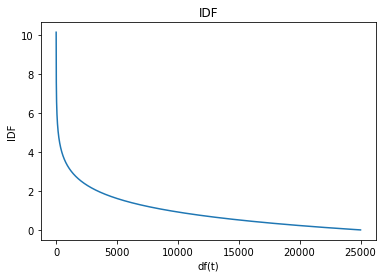

In [12]:
#import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

TF-IDFではこの数を出現回数に掛け合わせるので、珍しいトークンの登場に重み付けを行なっていることになります。


### ストップワード
あまりにも頻繁に登場するトークンは、値を小さくするだけでなく、取り除くという前処理を加えることもあります。取り除くもののことを**ストップワード**と呼びます。既存のストップワード一覧を利用したり、しきい値によって求めたりします。


scikit-learnのCountVectorizerでは引数stop_wordsにリストで指定することで処理を行なってくれます。



In [13]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


代表的な既存のストップワード一覧としては、**NLTK**という自然言語処理のライブラリのものがあげられます。あるデータセットにおいては特別重要な意味を持つ単語が一覧に含まれている可能性もあるため、使用する際は中身を確認することが望ましいです。

In [14]:
# はじめて使う場合はストップワードをダウンロード
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

逆に、登場回数が特に少ないトークンも取り除くことが多いです。全てのトークンを用いるとベクトルの次元数が著しく大きくなってしまい計算コストが高まるためです。


scikit-learnのCountVectorizerでは引数max_featuresに最大の語彙数を指定することで処理を行なってくれます。以下の例では出現数が多い順に5個でベクトル化しています。

In [15]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


### 【問題2】
#### TF-IDFの計算
IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。


TF-IDFの計算にはscikit-learnの以下のどちらかのクラスを使用してください。


[sklearn.feature_extraction.text.TfidfVectorizer — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

[sklearn.feature_extraction.text.TfidfTransformer — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)


なお、scikit-learnでは標準的な式とは異なる式が採用されています。


また、デフォルトでは`norm="l2"`の引数が設定されており、各サンプルにL2正規化が行われます。`norm=None`とすることで正規化は行われなくなります。


Term Frequency:

$$
tf(t,d) = n_{t,d}
$$

$n_{t, d}$ : サンプルd内のトークンtの出現回数


scikit-learnのTFは分母がなくなりBoWと同じ計算になります。


Inverse Document Frequency:

$$
idf(t) = \log{\frac{1+N}{1+df(t)}}+1
$$

$N$ : サンプル数


$df(t)$ : トークンtが出現するサンプル数


＊logの底はネイピア数e


詳細は以下のドキュメントを確認してください。


[5.2.3.4. Tf–idf term weighting — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting)

In [59]:
# IMDB読み込み
# train
train_review = load_files('./aclImdb/train/', encoding='utf-8')
X_train_list, y_train = train_review.data, train_review.target
# test
test_review = load_files('./aclImdb/test/', encoding='utf-8')
X_test_list, y_test = test_review.data, test_review.target
print(train_review.target_names)

['neg', 'pos']


In [48]:
print("train sample:\n", X_train_list[0])
print("tesr sample:\n", X_test_list[0])

train sample:
 Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.
tesr sample:
 Don't hate Heather Graham because she's beautiful, hate her because she's fun to watch in this movie. Like the hip clothing and funky surroundings, the actors in this flick work well together. Casey Affleck

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
token_pattern = r'\b\w+\b'
stop_words = stopwords.words('english')
max_features = 5000

# TF-IDF
vectorizer = TfidfVectorizer(token_pattern=token_pattern,
                                 stop_words=stop_words,
                                 max_features=max_features)
vectorizer.fit(X_train_list)
arr_train = vectorizer.transform(X_train_list).toarray()
arr_test = vectorizer.transform(X_test_list).toarray()
df_train = pd.DataFrame(arr_train, columns=vectorizer.get_feature_names())
df_test = pd.DataFrame(arr_test, columns=vectorizer.get_feature_names())

display(df_train)
display(df_test)

,0,00,000,1,10,100,11,12,13,13th,...,york,young,younger,youth,z,zero,zizek,zombie,zombies,zone
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.164505,0.0,0.0,0.0,0.136932,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.124442,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.085006,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.0,0.000000,0.000000,0.052273,0.0,0.0,0.0,0.0,...,0.095763,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
24996,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
24997,0.0,0.0,0.0,0.000000,0.068246,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
24998,0.0,0.0,0.0,0.101521,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


,0,00,000,1,10,100,11,12,13,13th,...,york,young,younger,youth,z,zero,zizek,zombie,zombies,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 【問題3】
#### TF-IDFを用いた学習
問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。モデルは2値分類が行える任意のものを利用してください。


ここでは精度の高さは求めませんが、最大の語彙数やストップワード、n-gramの数を変化させて影響を検証してみてください。

In [60]:
#train, testデータ作成
vectorizer = TfidfVectorizer(token_pattern=token_pattern,
                             stop_words=stop_words,
                             max_features=max_features)
## train
vectorizer.fit(X_train_list)
X_train = vectorizer.transform(X_train_list).toarray()
y_train = y_train.reshape(-1, 1)
print(X_train.shape, y_train.shape)
## test
X_test = vectorizer.transform(X_test_list).toarray()
y_test = y_test.reshape(-1, 1)
# 一応シャッフルしてみる
p = np.random.permutation(X_test.shape[0])
X_test = X_test[p]
y_test = y_test[p]
print(X_test.shape, y_test.shape)

(25000, 5000) (25000, 1)
(25000, 5000) (25000, 1)


In [61]:
# ロジスティック回帰で解いてみる
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
clf = LogisticRegression(random_state=0)
# 学習
clf.fit(X_train, y_train)

(18750, 5000) (18750, 1)
(6250, 5000) (6250, 1)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
from sklearn.metrics import log_loss, accuracy_score
# validation(loss) 
y_val_pred = clf.predict_proba(X_val)[:, 1]
print("y_val_pred:", y_val_pred[:5])
print("y_val     :", y_val[:5].flatten())
print("loss      :", log_loss(y_val, y_val_pred))
# test(acc)
y_test_pred = clf.predict(X_test)
print("y_test_pred:", y_test_pred[:20])
print("y_test     :", y_test[:20].flatten())
print("accuracy   :", accuracy_score(y_test, y_test_pred))

y_val_pred: [0.3921986  0.66540572 0.11857337 0.82972493 0.23330044]
y_val     : [0 1 0 0 0]
loss      : 0.3108701077520721
y_test_pred: [1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0]
y_test     : [1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0]
accuracy   : 0.88196


-> lossはそこそこ？正解率は9割弱と悪くはなさそう

### 【問題4】
#### TF-IDFのスクラッチ実装
以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。

```
This movie is SOOOO funny!!!
What a movie! I never
best movie ever!!!!! this movie
```

-> データセットは`mini_dataset_1`を流用

In [22]:
# 1. 標準ver.
def TF_IDF_standard(texts:list, ngram_range=1, max_features=5000):
    """
    arr_bow   : shape(data_num, token_num)
    arr_tf    : shape(data_num, token_num)
    arr_idf   : shape(1       , token_num)
    arr_tf_idf: shape(data_num, token_num)
    """
    # BoW求める
    df_bow = BoW(texts=texts, ngram_range=ngram_range)

    # 列数制限（出現頻度降順）
    if max_features < len(df_bow.columns):
        indexes = df_bow.sum(axis=0).sort_values(ascending=False).index[:max_features]
        df_bow = df_bow[indexes] 
    
    # numpyにして計算
    arr_bow = df_bow.values

    # TF
    num_tokens = np.sum(arr_bow, axis=1, keepdims=True)
    arr_tf = arr_bow / num_tokens

    # IDF
    arr_idf = np.log(arr_bow.shape[0] / np.count_nonzero(arr_bow, axis=0).reshape(1, -1))

    # TF-TDF
    arr_tf_idf = arr_tf * arr_idf
    df_tf_idf = pd.DataFrame(data=arr_tf_idf, columns=df_bow.columns)

    return df_tf_idf

In [23]:
display(TF_IDF_standard(mini_dataset_1))
display(TF_IDF_standard(mini_dataset_1, ngram_range=2))
display(TF_IDF_standard(mini_dataset_1, ngram_range=2, max_features=5))
# 参考
display(BoW(mini_dataset_1, ngram_range=2).sum(axis=0).sort_values(ascending=False))

,funny,what,movie,is,a,ever,this,i,best,soooo,never
0,0.219722,0.000000,0.0,0.219722,0.000000,0.000000,0.081093,0.000000,0.000000,0.219722,0.000000
1,0.000000,0.219722,0.0,0.000000,0.219722,0.000000,0.000000,0.219722,0.000000,0.000000,0.219722
2,0.000000,0.000000,0.0,0.000000,0.000000,0.219722,0.081093,0.000000,0.219722,0.000000,0.000000


,soooo funny,movie i,this movie,what a,ever this,movie is,i never,is soooo,a movie,best movie,movie ever
0,0.274653,0.000000,0.101366,0.000000,0.000000,0.274653,0.000000,0.274653,0.000000,0.000000,0.000000
1,0.000000,0.274653,0.000000,0.274653,0.000000,0.000000,0.274653,0.000000,0.274653,0.000000,0.000000
2,0.000000,0.000000,0.101366,0.000000,0.274653,0.000000,0.000000,0.000000,0.000000,0.274653,0.274653


,this movie,movie ever,best movie,a movie,is soooo
0,0.202733,0.000000,0.000000,0.000000,0.549306
1,0.000000,0.000000,0.000000,1.098612,0.000000
2,0.135155,0.366204,0.366204,0.000000,0.000000


this movie     2
movie ever     1
best movie     1
a movie        1
is soooo       1
i never        1
movie is       1
ever this      1
what a         1
movie i        1
soooo funny    1
dtype: int64

In [24]:
# 2. sklearn実装版
def TF_IDF_sklearn(texts:list, ngram_range=1, max_features=5000):
    """
    arr_bow   : shape(data_num, token_num)
    arr_tf    : shape(data_num, token_num)
    arr_idf   : shape(1       , token_num)
    arr_tf_idf: shape(data_num, token_num)
    """
    # BoW求める
    df_bow = BoW(texts=texts, ngram_range=ngram_range)

    # 列数制限（出現頻度降順）
    if max_features < len(df_bow.columns):
        indexes = df_bow.sum(axis=0).sort_values(ascending=False).index[:max_features]
        df_bow = df_bow[indexes] 
    
    # numpyにして計算
    arr_bow = df_bow.values

    # TF: BoWと同じ
    arr_tf = arr_bow

    # IDF: なんかごちゃごちゃする
    arr_idf = np.log((1+arr_bow.shape[0]) / (1+np.count_nonzero(arr_bow, axis=0).reshape(1, -1))) + 1

    # TF-TDF
    arr_tf_idf = arr_tf * arr_idf
    df_tf_idf = pd.DataFrame(data=arr_tf_idf, columns=df_bow.columns)

    return df_tf_idf

In [25]:
display(TF_IDF_sklearn(mini_dataset_1))
display(TF_IDF_sklearn(mini_dataset_1, ngram_range=2))
display(TF_IDF_sklearn(mini_dataset_1, ngram_range=2, max_features=5))
# 参考
display(BoW(mini_dataset_1, ngram_range=2).sum(axis=0).sort_values(ascending=False))
# 実際のsklearnの実装(正則化なし)
vec = TfidfVectorizer(token_pattern=r'\b\w+\b', norm=None)
arr_sk = vec.fit_transform(mini_dataset_1).toarray()
display(pd.DataFrame(data=arr_sk, columns=vec.get_feature_names()))

,funny,what,movie,is,a,ever,this,i,best,soooo,never
0,1.693147,0.000000,1.0,1.693147,0.000000,0.000000,1.287682,0.000000,0.000000,1.693147,0.000000
1,0.000000,1.693147,1.0,0.000000,1.693147,0.000000,0.000000,1.693147,0.000000,0.000000,1.693147
2,0.000000,0.000000,2.0,0.000000,0.000000,1.693147,1.287682,0.000000,1.693147,0.000000,0.000000


,soooo funny,movie i,this movie,what a,ever this,movie is,i never,is soooo,a movie,best movie,movie ever
0,1.693147,0.000000,1.287682,0.000000,0.000000,1.693147,0.000000,1.693147,0.000000,0.000000,0.000000
1,0.000000,1.693147,0.000000,1.693147,0.000000,0.000000,1.693147,0.000000,1.693147,0.000000,0.000000
2,0.000000,0.000000,1.287682,0.000000,1.693147,0.000000,0.000000,0.000000,0.000000,1.693147,1.693147


,this movie,movie ever,best movie,a movie,is soooo
0,1.287682,0.000000,0.000000,0.000000,1.693147
1,0.000000,0.000000,0.000000,1.693147,0.000000
2,1.287682,1.693147,1.693147,0.000000,0.000000


this movie     2
movie ever     1
best movie     1
a movie        1
is soooo       1
i never        1
movie is       1
ever this      1
what a         1
movie i        1
soooo funny    1
dtype: int64

,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0.000000,0.000000,0.000000,1.693147,0.000000,1.693147,1.0,0.000000,1.693147,1.287682,0.000000
1,1.693147,0.000000,0.000000,0.000000,1.693147,0.000000,1.0,1.693147,0.000000,0.000000,1.693147
2,0.000000,1.693147,1.693147,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,1.287682,0.000000


## 7.Word2Vec

ニューラルネットワークを用いてベクトル化を行う手法が**Word2Vec**です。


BoWやTF-IDFはone-hot表現であったため、得られるベクトルの次元は語彙数分になります。そのため、語彙数を増やしにくいという問題があります。一方で、Word2Vecでは単語を任意の次元のベクトルに変換します。これをを**Word Embedding（単語埋め込み）**や**分散表現**と呼びます。変換操作を「ベクトル空間に埋め込む」と言うことが多いです。


Word2VecにはCBoWとSkip-gramという2種類の仕組みがあるため順番に見ていきます。


### CBoW
**CBoW (Continuous Bag-of-Words)**によるWord2Vecではある単語とある単語の間に来る単語を推定できるように全結合層2層のニューラルネットワークを学習します。


単語はコーパスの語彙数次元のone-hot表現を行なっておきます。そのため、入力と出力の次元は語彙数と同じになります。一方で、中間のノード数をWord2Vecにより得たい任意の次元数とします。これにより全結合層の重みは「得たい次元のノード数×語彙数」になります。このネットワークにより学習を行なった後、出力側の重みを取り出すことで、各語彙を表すベクトルを手に入れることができます。


間の単語の推定を行なっているため、同じ箇所で代替可能な言葉は似たベクトルになるというメリットもあります。これはBoWやTF-IDFでは得られない情報です。


あるテキストは「そのテキストの長さ（単語数）×Word2Vecで得た分散表現の次元数」の配列になりますが、各入力の配列を揃える必要があるモデルに入力するためには、短いテキストは空白を表す単語を加える**パディング**を行なったり、長いテキストは単語を消したりします。テキストを**固定長**にすると呼びます。


### ウィンドウサイズ
入力する単語は推定する前後1つずつだけでなく、複数個とする場合もあります。前後いくつを見るかの大きさを**ウィンドウサイズ**と呼びます。


### Skip-gram
CBoWとは逆にある単語の前後の単語を推定できるように全結合層2層のニューラルネットワークを学習する方法が**Skip-gram**です。学習を行なった後は入力側の重みを取り出し各語彙を表すベクトルとします。現在一般的に使われているのはCBoWよりもSki-gramです。


### 利用方法
Pythonでは**Gensim**ライブラリを用いて扱うことができます。


[gensim: models.word2vec – Word2vec embeddings](https://radimrehurek.com/gensim/models/word2vec.html)


BoWの例と同じ文章で学習してみます。CountVectorizerと異なり前処理を自動的に行なってはくれないため、単語（トークン）はリストで分割しておきます。また、大文字は小文字に揃え、記号は取り除きます。


デフォルトのパラメータではCBoWで計算されます。また、ウィンドウサイズは`window=5`に設定されています。

In [26]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習
print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
  print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[-0.00137751 -0.01912601 -0.01646692  0.01055213  0.02546072 -0.01897931
  0.01846048  0.01851344 -0.04588394 -0.02872039]
movieのベクトル : 
[-0.03412294  0.02721599 -0.04920964  0.03518296 -0.04448099  0.02659944
 -0.03588147 -0.01431714  0.01924172 -0.02234992]
isのベクトル : 
[ 0.00936059 -0.00691784 -0.04120041 -0.01355407 -0.03737567 -0.03421419
  0.04467475  0.0072433   0.04167444  0.03712521]
veryのベクトル : 
[ 0.01215078 -0.03694268  0.01803472 -0.03616872 -0.02633858 -0.03130399
  0.00427076 -0.04062524  0.0191025   0.00797835]
goodのベクトル : 
[ 0.00274894 -0.03821448 -0.04732439  0.00130707 -0.02533777  0.01740807
 -0.02688087  0.01490927  0.02636272  0.04988785]
filmのベクトル : 
[-0.03286526  0.03429671 -0.00046253  0.01757191 -0.0314851  -0.03971883
 -0.04214101  0.0397606  -0.0209197   0.00880349]
aのベクトル : 
[ 0.03543486 -0.01733698  0.02771189  0.02087257 -0.03533319 -0.0033517
  0.04493702 -0.04849194

このようにしてベクトルが得られます。


### 単語の距離
ベクトル間で計算を行うことで、ある単語に似たベクトルを持つ単語を見つけることができます。例えばgoodに似たベクトルの単語を3つ探します。

In [27]:
model.wv.most_similar(positive="good", topn=3)

[('is', 0.47893407940864563),
 ('movie', 0.3080799877643585),
 ('bad', 0.17301228642463684)]

今の例では3文しか学習していませんので効果を発揮しませんが、大きなコーパスで学習することで、並列関係のものが近くに来たりなど面白い結果が得られます。


### 可視化
2次元に圧縮することで単語ごとの位置関係を可視化することができます。以下はt-SNEを用いた例です。

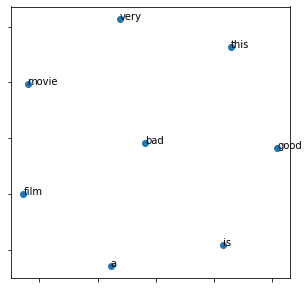

In [28]:
from sklearn.manifold import TSNE
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

## 8.IMDB映画レビューデータセットの分散表現

IMDB映画レビューデータセットの訓練データをコーパスとしてWord2Vecを学習させ分散表現を獲得しましょう。

### 【問題5】
#### コーパスの前処理
コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。また、単語（トークン）はリストで分割してください。

In [29]:
import string
def text_processor(texts:list, ngram_range=1):
    # 処理済みテキスト
    processed_texts = []
    
    # htmlタグ除去用正規表現オブジェクト
    html_tag = re.compile(r'<[^>]*?>')
    
    # url除去用正規表現オブジェクト()
    url = re.compile(r'https?:\/\/.*\s')
    
    # 記号テーブル作成 -> ngram_splitterでやる
    #symbol_table = str.maketrans('', '', string.punctuation)
    
    ## 処理開始
    for t in texts:
        # htmlタグ(半角スペースで置換)
        t = html_tag.sub(' ', t)
        
        # url
        t = url.sub('', t)
        
        # 記号 -> ngram_splitterでやる
        #t = t.translate(symbol_table)
        
        # 小文字にする -> ngram_splitterでやる
        #t = t.lower()
        
        # 処理済みリストに追加
        processed_texts.append(t)

    # ngram分割
    _, processed_texts = ngram_splitter(texts=processed_texts, ngram_range=ngram_range)

    return processed_texts

In [65]:
# 訓練データ: X_train_list
t_sample = X_train_list[0]
print('bofore:\n', t_sample)
print('after:\n', text_processor([t_sample])[0])

bofore:
 Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.
after:
 ['zero', 'day', 'leads', 'you', 'to', 'think', 'even', 're', 'think', 'why', 'two', 'boys', 'young', 'men', 'would', 'do', 'what', 'they', 'did', 'commit', 'mutual', 'suicide', 'via', 'slaughtering', 'their', 'classmat

### 【問題6】
#### Word2Vecの学習
Word2Vecの学習を行なってください。

In [66]:
# X_train_list使用
sentences = text_processor(texts=X_train_list, ngram_range=1)
model = Word2Vec(min_count=1, size=10)
model.build_vocab(sentences) 
# 学習
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) 

(22425484, 29760235)

In [68]:
print("語彙の一覧(一部) : {}".format(list(model.wv.vocab.keys())[:10]))
for vocab in list(model.wv.vocab.keys())[:10]:
  print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧(一部) : ['zero', 'day', 'leads', 'you', 'to', 'think', 'even', 're', 'why', 'two']
zeroのベクトル : 
[-0.7141181   0.3093136  -1.7085313  -0.14746065 -0.13577747 -0.77430236
 -2.7019207  -2.7725503  -2.5900571   1.1651999 ]
dayのベクトル : 
[ 3.2657793  -0.70205903 -0.54309565  1.998521   -0.07165112 -0.3055722
 -3.0978365   2.2643495  -0.30100265 -3.8299658 ]
leadsのベクトル : 
[ 0.44822574  2.7457068  -2.2425995   0.95430374 -1.6587052  -2.5440626
  3.4174974   0.11301841  3.027808   -1.0262641 ]
youのベクトル : 
[  0.5270056  -1.2170719  -6.4533176   0.7528806   3.9139073   6.690193
 -10.193706    1.1218386   1.9155116   2.5701644]
toのベクトル : 
[ 2.6273353  -1.0966208  -1.613776   -3.114631   -1.3487362   5.488776
 -3.6005101   0.09699306  3.1176307   1.3296027 ]
thinkのベクトル : 
[ 1.9607207  -2.412374   -6.206496    3.0656245   0.755463   -1.1643919
 -0.86421275  5.8726993  -1.9821011   1.3960394 ]
evenのベクトル : 
[ 0.74098945 -0.8988575  -4.737987    1.369714    1.08439     1.4633279
 -2.0381417   0.6693

### 【問題7】
#### （アドバンス課題）ベクトルの可視化
得られたベクトルをt-SNEにより可視化してください。また、いくつかの単語を選びwv.most_similarを用いて似ている単語を調べてください。

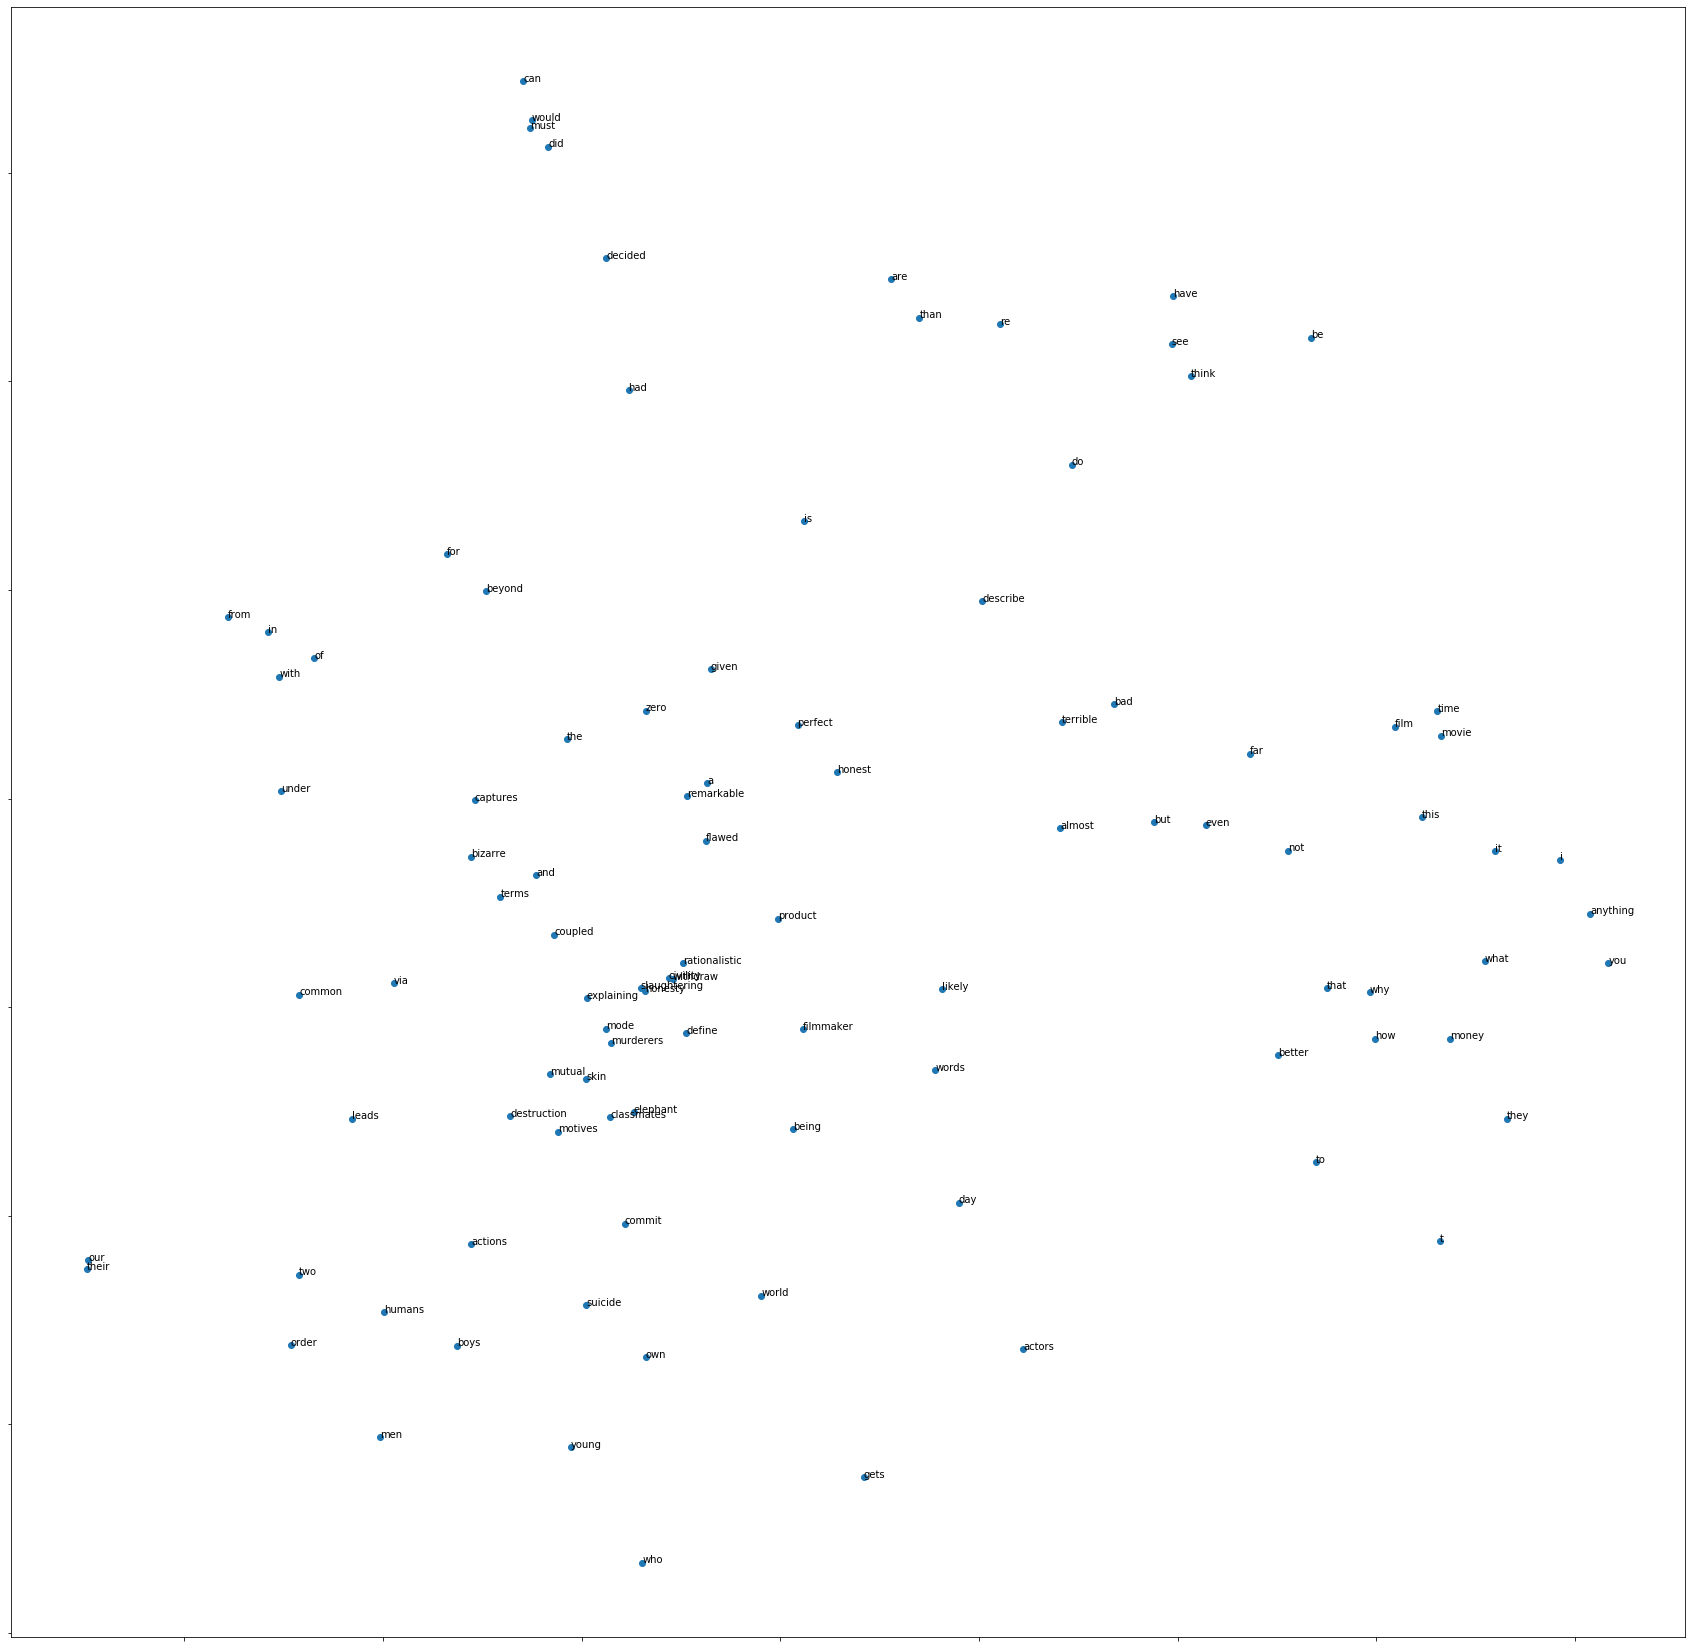

In [79]:
vocabs = list(model.wv.vocab.keys())[:100]
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(30, 30))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

### 学習済みベクトル
巨大なコーパスで学習して得たベクトルも公開されているため、自分で学習をせずに利用することもできます。オリジナルのWord2Vecの他に同じ作者の発展系である**FastText**やスタンフォード大の**GloVe**があり、それぞれ公開されています。

### 【問題8】
#### （アドバンス課題）Word2Vecを用いた映画レビューの分類
問題6で学習して得たベクトルや公開されている学習済みベクトルを用いてIMDB映画レビューデータセットの感情分類の学習・推定を行なってください。